# SHAP values calculation for Chained Classifier 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
import joblib
import pandas as pd
import shap
InteractiveShell.ast_node_interactivity = "all"

In [2]:
Xi=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\Xi.csv')
Xi_hold=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\Xi_hold.csv')
y=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y.csv')
y_hold=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_hold.csv')
y_hold_nssi=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_hold_nssi.csv')
y_hold_si=pd.read_csv(r'C:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\processed_data\y_hold_si.csv')

In [3]:
#Dropping the sitbs column as we are only interested in predicting each component outcome with the chained classifier
y=y.drop(columns='sitbs')

### SHAP values for Chained Classifier

In [4]:
#Loading the previously fitted classifier chain
chain=joblib.load(r'c:\Users\z5291979\OneDrive - UNSW\Documents\lsac-data\lsac-suicidality\models\cclf2802_RF.sav')

In [5]:
explainer=shap.KernelExplainer(model=chain.predict_proba, data=Xi.head(200))

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [6]:
shap_values=explainer.shap_values(X=Xi_hold.head(200))

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
#Save shap values into csv
sre=['si', 'nssi', 'att']

for idx, s in enumerate(sre):
    globals()[f"{s}_shap"]=pd.DataFrame(shap_values[idx])
    globals()[f"{s}_shap"].to_csv(f"cclf_{s}_shap.csv", index=False)

In [9]:
#Self-harm related questions (except hs54e- no. of suicide attempts) are coded as 1 Yes 2 No, recode to 0 No 1 Yes
#Saving a dataframe for the first 200 participants in the holdout data 
Xi_hold_200=Xi_hold.head(200)
shvar=['hs54a', 'hs54b', 'hs54c', 'hs54d', 'hs54f']
for v in shvar:
    Xi_hold_200[v]=Xi_hold_200[v].replace({2:0})


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
#Just changing the missing values for hs54b to another arbitrary value because the negative values make the graphs look strange
Xi_hold_200['hs54b']=Xi_hold_200['hs54b'].replace({-9:0.5})
Xi_hold_200['hs54b'].value_counts()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


hs54b
0.0    185
1.0      9
0.5      6
Name: count, dtype: int64

In [6]:
sre=['si', 'nssi', 'att']

for s in sre:
    globals()[f"{s}_shap"]=pd.read_csv(f'C:/Users/z5291979/OneDrive - UNSW/Documents/lsac-data/processed_data/cclf_{s}_shap.csv')
    globals()[f"{s}_shap"]=globals()[f"{s}_shap"].to_numpy()

SI Beeswarm Plot


([<matplotlib.axis.YTick at 0x1e6987e51b0>,
 [Text(0, 0, 'SDQ emotional symptoms'),
  Text(0, 1, 'CHU9D score'),
  Text(0, 2, 'Prior suicidal ideation'),
  Text(0, 3, 'Prior self-harm thoughts'),
  Text(0, 4, 'Prior suicide plan')])

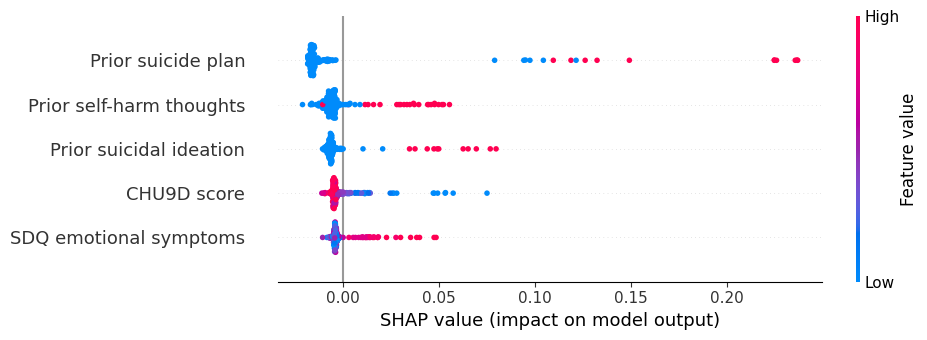

In [12]:
#Note that shap.initjs() needs to be run to produce the visualisations- otherwise there will be an error that says Javascript library not omitted
shap.initjs()
print('SI Beeswarm Plot')
#Note- to customise the bar plot further, specify show=False to avoid calling matplotlib.pyplot.show() before the extra customisation code occurs
shap.summary_plot(si_shap, features=Xi_hold_200, max_display=5, show=False)
si_flabels=['Prior suicide plan', 'Prior self-harm thoughts', 'Prior suicidal ideation', 'CHU9D score', 'SDQ emotional symptoms']
si_flabels.reverse()
#Insert labels=si_flabels below when available
plt.yticks(range(5), labels=si_flabels)
plt.show()


NSSI Beeswarm Plot


([<matplotlib.axis.YTick at 0x1e69cad5780>,
 [Text(0, 0, 'PSSM scale'),
  Text(0, 1, 'Prior suicidal ideation'),
  Text(0, 2, 'Prior self-harm thoughts'),
  Text(0, 3, 'Prior suicide plan'),
  Text(0, 4, 'Prior self-harm')])

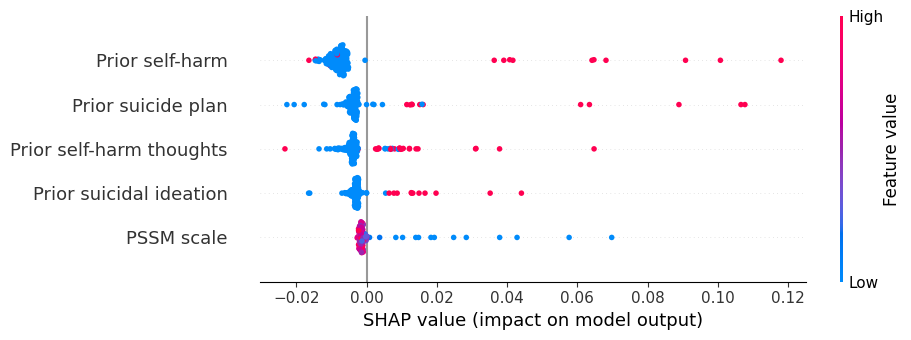

In [13]:
print('NSSI Beeswarm Plot')
#Note- to customise the bar plot further, specify show=False so that matplotlib.pyplot.show() is not called before the extra customisation code occurs
shap.summary_plot(nssi_shap, features=Xi_hold_200, max_display=5, show=False)
nssi_flabels=['Prior self-harm', 'Prior suicide plan', 'Prior self-harm thoughts',  'Prior suicidal ideation', 'PSSM scale']
nssi_flabels.reverse()
plt.yticks(range(5), labels=nssi_flabels)
plt.show()


Attempts Beeswarm Plot


([<matplotlib.axis.YTick at 0x1e69cba7370>,
 [Text(0, 0, 'SDQ emotional symptoms'),
  Text(0, 1, 'Prior self-harm'),
  Text(0, 2, 'Prior suicidal ideation'),
  Text(0, 3, 'SDQ total score'),
  Text(0, 4, 'Prior suicide plan')])

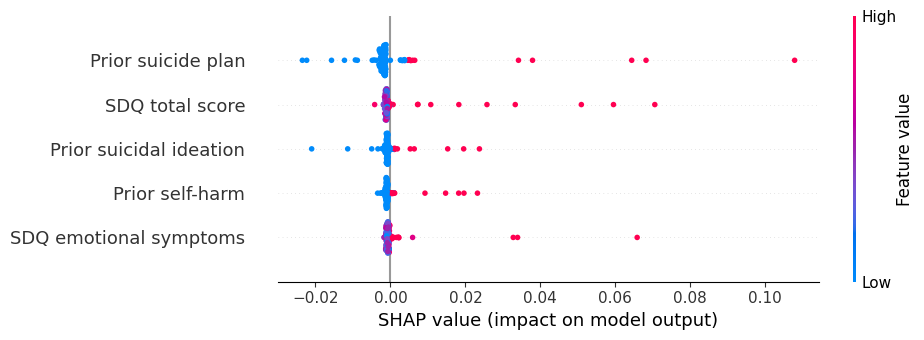

In [14]:
print('Attempts Beeswarm Plot')
#Note- to customise the bar plot further, specify show=False so that matplotlib.pyplot.show() is not called before the extra customisation code occurs
shap.summary_plot(att_shap, features=Xi_hold_200, max_display=5, show=False)
att_flabels=['Prior suicide plan', 'SDQ total score', 'Prior suicidal ideation', 'Prior self-harm', 'SDQ emotional symptoms']
att_flabels.reverse()
plt.yticks(range(5), labels=att_flabels)
plt.show()

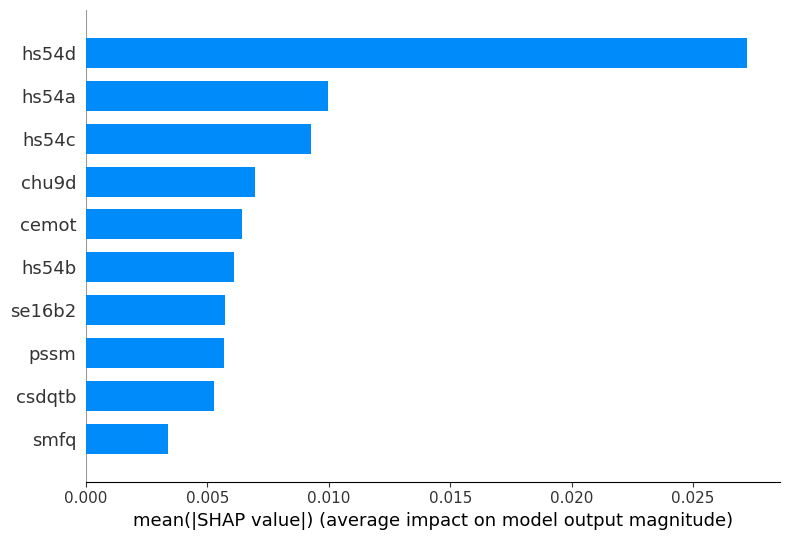

In [12]:
shap.summary_plot(si_shap, features=Xi_hold_200, plot_type='bar', max_display=10, show=False)

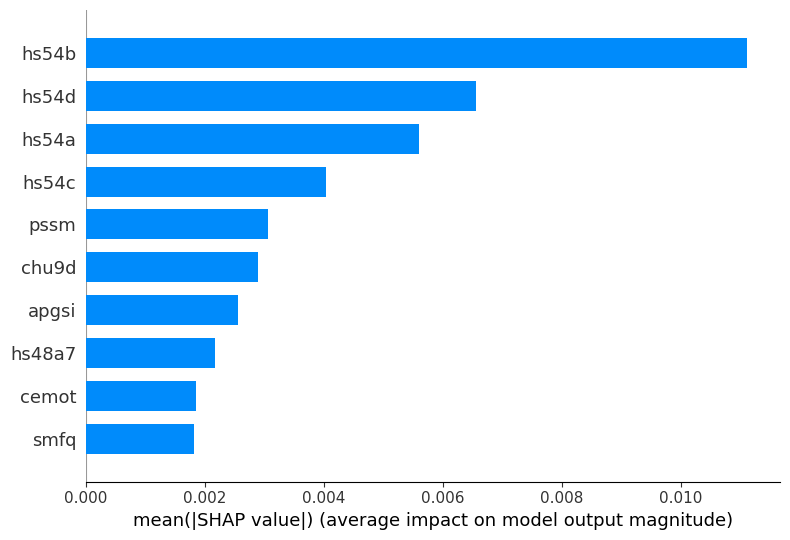

In [24]:
shap.summary_plot(nssi_shap, features=Xi_hold.head(200), plot_type='bar', max_display=10)

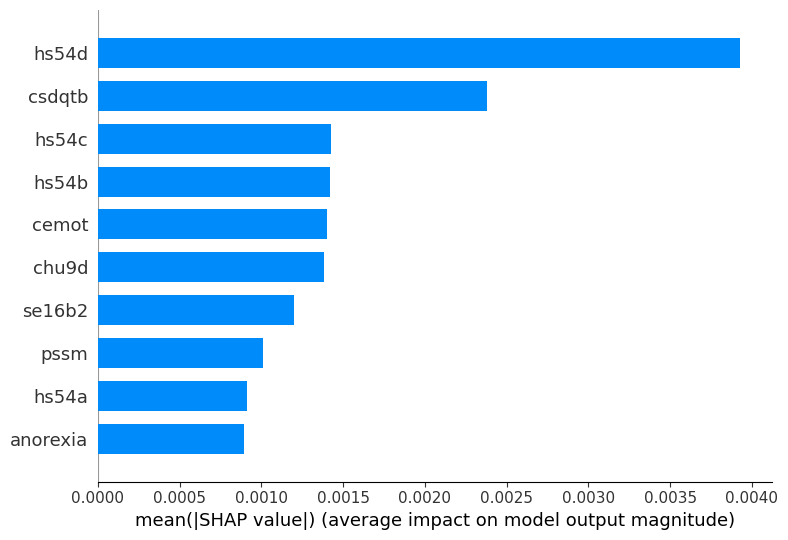

In [26]:
shap.summary_plot(att_shap, features=Xi_hold.head(200), plot_type='bar', max_display=10)